# Тест

1. Что такое число обусловленности СЛАУ (дать определение)? Как относительная ошибка решения СЛАУ зависит от относительной ошибки входных данных?
2. Пусть $z = f(x, y)$, причем величина x получается в результате приближенных измерений с неустранимой погрешностью $\Delta x = 10^{–3}$ . Пусть при вычислении z нас интересует абсолютная погрешность. С какой разумной точностью (и почему) следует измерять y? $z = x + 10y$

## Пример практической задачи по теме

На сетке в одномерной области определена сеточная ф-я. Вычислить производную в произвольном узле с максимально возможным порядком точности. Определить порядок точности предложенного метода (наприме, центральная разность) численно.

## Теоретическое описание метода неопределенных коэффициентов и его программная реализация

Пусть в одномерной области $[x_{min}, x_{max}]$ задана равномерная сетка из $N = m + l + 1$ узлов (Равномерная сетка - сетка, расстояние между двумя любыми соседними узлами которой равно постоянному h, где h - сеточный шаг). На этой области определена бесконечно непрерывно дифференцируемая ф-я $f$. Известны значения этой ф-и во всех узлах рассматриваемой сетки $\{f_i\}_{i=0}^N$ (говорять, что определена сеточная ф-я - проекция ф-и на сетку). Пусть нас интересует значение производной в некотором узле $j$, слева от которого $l$ узлов, справа $m$. Построим метод максимального порядка точности по значениям функции в сеточных узлах. Для этого представим производную в узле $j$ как сумму значений ф-и во всех узлах, взятых с некоторыми весами:
$$
f'(x_j) \approx \frac{1}{h}\sum_{k = -l}^m \alpha_k f(x_j+kh)
$$
Подберем веса так, чтобы по этим значениям порядок точности был максимальным. Оказывается, что по $N$ точкам можно построить метод $N-1$-го порядка точности.

Контрольный вопрос: что такое порядок точности метода?

Для этого разложим в ряд Тейлора все члены, входящие в суммирование в выбранной аппроксимации (численном приближении), относительно точки $x_j$, сгруппируем члены при одинаковых степенях и приравняем к нулю коэффициенты при степенях ниже N (кроме первой, для нее приравняем к 1). В итоге получим N уравнений относительно N неизвестных.

Контрольный вопрос: почему в этом случае порядок метода будет $N-1$?

В матричном виде получившуюся систему можно представить как $A\alpha = b$, где $b^T$ = $(0,1,0,...,0)^T$, а матрица A
$$
A = \begin{pmatrix} 
1 & 1 & ... & 1 \\
-l & -l+1 & ... & m \\
(-l)^2 & (-l+1)^2 & ... & m^2 \\
(-l)^3 & (-l+1)^3 & ...  & m^3 \\
...&...&...&...\\
\end{pmatrix}
$$

Контрольный вопрос: как называется такая матрица? Существует ли единственное решение системы и почему?

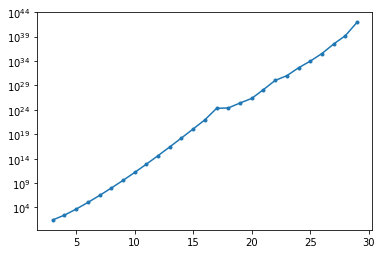

In [5]:
#скрипт, который реализует описанный выше алгоритм
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt

def par_con(u, l, m, h):
    n = u.size
    v = np.linspace(-l,m, n)
    A = np.fliplr(np.vander(v, v.size)).T
    #b = np.zeros(n)
    #b[1] = 1
    #alpha = la.solve(A,b)
    #diff = 1/h*alpha.dot(u.T)
    #return diff
    par_con = la.cond(A, 1)
    return par_con

max_p = 30
errors = np.zeros(max_p-3)
run_p = np.zeros(max_p-3)
for p in range(3,30):
    run_p[p-3] = p
    a = np.pi/3
    b = np.pi/2
    h = (b-a)/(p-1)
    x = np.linspace(a, b, p)
    u = np.sin(x) #ищем производную синуса
    par = par_con(u, 0, p-1, h)#diff = get_diff(u, 0, p-1, h)
    errors[p-3] = par#np.abs(1/2-diff)
    """print(run_p[p-3], " ", errors[p-3])"""

fig = plt.figure()
ax = fig.gca()
ax.plot(run_p, errors,'.-')
ax.set_yscale('log')

In [54]:
#ЗАДАНИЕ 1: написать скрипт, который строит график зависимости абсолютной ошибки от числа узлов
#ЗАДАНИЕ 2: написать скрипт, который строит график зависимости числа обусловленности матрицы A системы с ростом ее размерности

## Пример задачи на использование метода неопределенных коэффициентов
Рассмотрим задачу. 

Задача: задана табличная ф-я
$$
\begin{matrix} 
x  & -1 & 1 & 2 \\
f(x) & 5  & 2 & 1 \\
\end{matrix}
$$

Ф-я f(x) во всех узлах задана с абсолютной погрешностью $10^{-1}$. Пусть ф-я f(x) принадлежит классу ф-й: $\max\left|f^{(3)}(x)\right| \le M_3 = 0.3$. Найти ф-лу вычисления производной в т. $x = -1$ со вторым порядком аппроксимации, вычислить производную в т. x = -1 и оценить точность вычисленного значения производной.

Решение:
аппроксимационная формула для вычисления первой производной с помощью метода неопределенных коэффициентов будет иметь вид
$$
f'(x) \approx \frac{\alpha_0 f(x) + \alpha_1 f(x+2h) + \alpha_2 f(x + 3h)}{h}
$$
Решая СЛАУ на неопределенные коэффициенты, получим $$\alpha_0 = - \frac{5}{6}, \alpha_1 = \frac{3}{2},\alpha_2 = - \frac{2}{3}$$.

Ошибка входных данных 
$$
\Delta_{in} = \frac{\left|\alpha_0\delta_0\right|+\left|\alpha_1\delta_1\right|+\left|\alpha_2\delta_2\right|}{h} = 0.3
$$

Ошибка метода (через разложением в ряд Тейлора всех членов, входящих в аппроксимацию, относительно $x$):
$$
\Delta_{method} = \frac{\left|\alpha_1 f'''(\xi_1)\right|\frac{8 h^3}{6}+\left|\alpha_2 f'''(\xi_2)\right|\frac{27 h^3}{6}}{h}\le M_3 5h^2
$$
Полная ошибка - сумма ошибки метода и входных данных.

Контрольный вопрос: как бы учитывалась относительная ошибка входных данных при оценке точности?

## Оценка порядка точности метода

Рассмотрим метод с порядком точности $p$. Тогда ошибка метода $\epsilon_h = Ch^p$, где $h$ - сеточный шаг. На сетке с двое меньшим шагом ошибка метода будет $\epsilon_{h/2} = C_1 \left(\frac{h}{2}\right)^p$. Если шаг h достаточно мелкий (ф-я меняется не очень сильно), то можно считать, что $C \approx C_1$. Тогда, исключив $C$ из первого равенства за счет второго, можно получить, что
$$
p = \log_2 \frac{\epsilon_h}{\epsilon_{h/2}}
$$

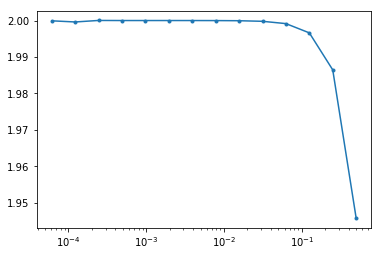

In [3]:
#ЗАДАНИЕ 3: написать скрипт, который численно будет определять порядок точности метода направленная разность. 
#Построить график зависимости p от шага сетки
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
import math

f = lambda x: np.sin(x)
df = lambda x: np.cos(x)

x0 = np.pi/4
N = 15
df_ap = np.zeros(N) 
h = np.zeros(N)
err = np.zeros(N)
order = np.zeros(N)
for k in range(0, N):
    h[k] = 1 / 2**k
    df_ap[k] = (f(x0 + h[k]) - f(x0 - h[k])) / (2 * h[k])
    err[k] = np.abs(df_ap[k] - df(x0))
    if (k>0):
        order[k] = math.log(err[k-1]/err[k], 2)

fig = plt.figure()
ax = fig.gca()
ax.plot(h[1:], order[1:],'.-')
#ax.set_yscale('log')
ax.set_xscale('log')

## Использование sympy для дифференцирования ф-й

Пакет sympy очень удобный инструмент для символьных вычислений. Рассмотрим пример его использования для дифференцирования:

In [2]:
#пример взять отсюда https://maths-with-python.readthedocs.io/en/latest/07-sympy.html
#еще про sympy можно посмотреть здесь http://www.asmeurer.com/sympy_doc/dev-py3k/tutorial/tutorial.ru.html
import sympy as sp
import numpy as np

x = sp.Symbol('x')

expression = x**2*sp.sin(sp.log(x))
print('Первая производная', sp.diff(expression, x))
print('Вторая производная', sp.diff(expression, x, 2))
print('Третья производная', sp.diff(expression, x, 3))

expr2 = sp.sin(x)
expr2 = sp.diff(expr2, x, 2)
expr2.subs(x, np.pi/2) #подстваляем значение и вычисляем символьное выражение

Первая производная 2*x*sin(log(x)) + x*cos(log(x))
Вторая производная sin(log(x)) + 3*cos(log(x))
Третья производная (-3*sin(log(x)) + cos(log(x)))/x


-1.00000000000000